# Пример работы с данными - задача регрессии

In [93]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os

In [94]:
URL_DATASET = 'https://drive.google.com/uc?id=1GR1d3h3mVE8ZFRzrqY2qVE__hGzB9ZTQ'

## Подготовка загрузки

In [96]:
URL_DATASET = 'https://drive.google.com/uc?id=1GR1d3h3mVE8ZFRzrqY2qVE__hGzB9ZTQ'

In [97]:
def load_dataset(csv_path):
    return pd.read_csv(csv_path)

In [98]:
data = load_dataset(URL_DATASET)
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [100]:
# При экспорте добавился nan столбец в конце данных
data = data.drop(data.columns[32], axis=1)
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [101]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [102]:
%matplotlib inline

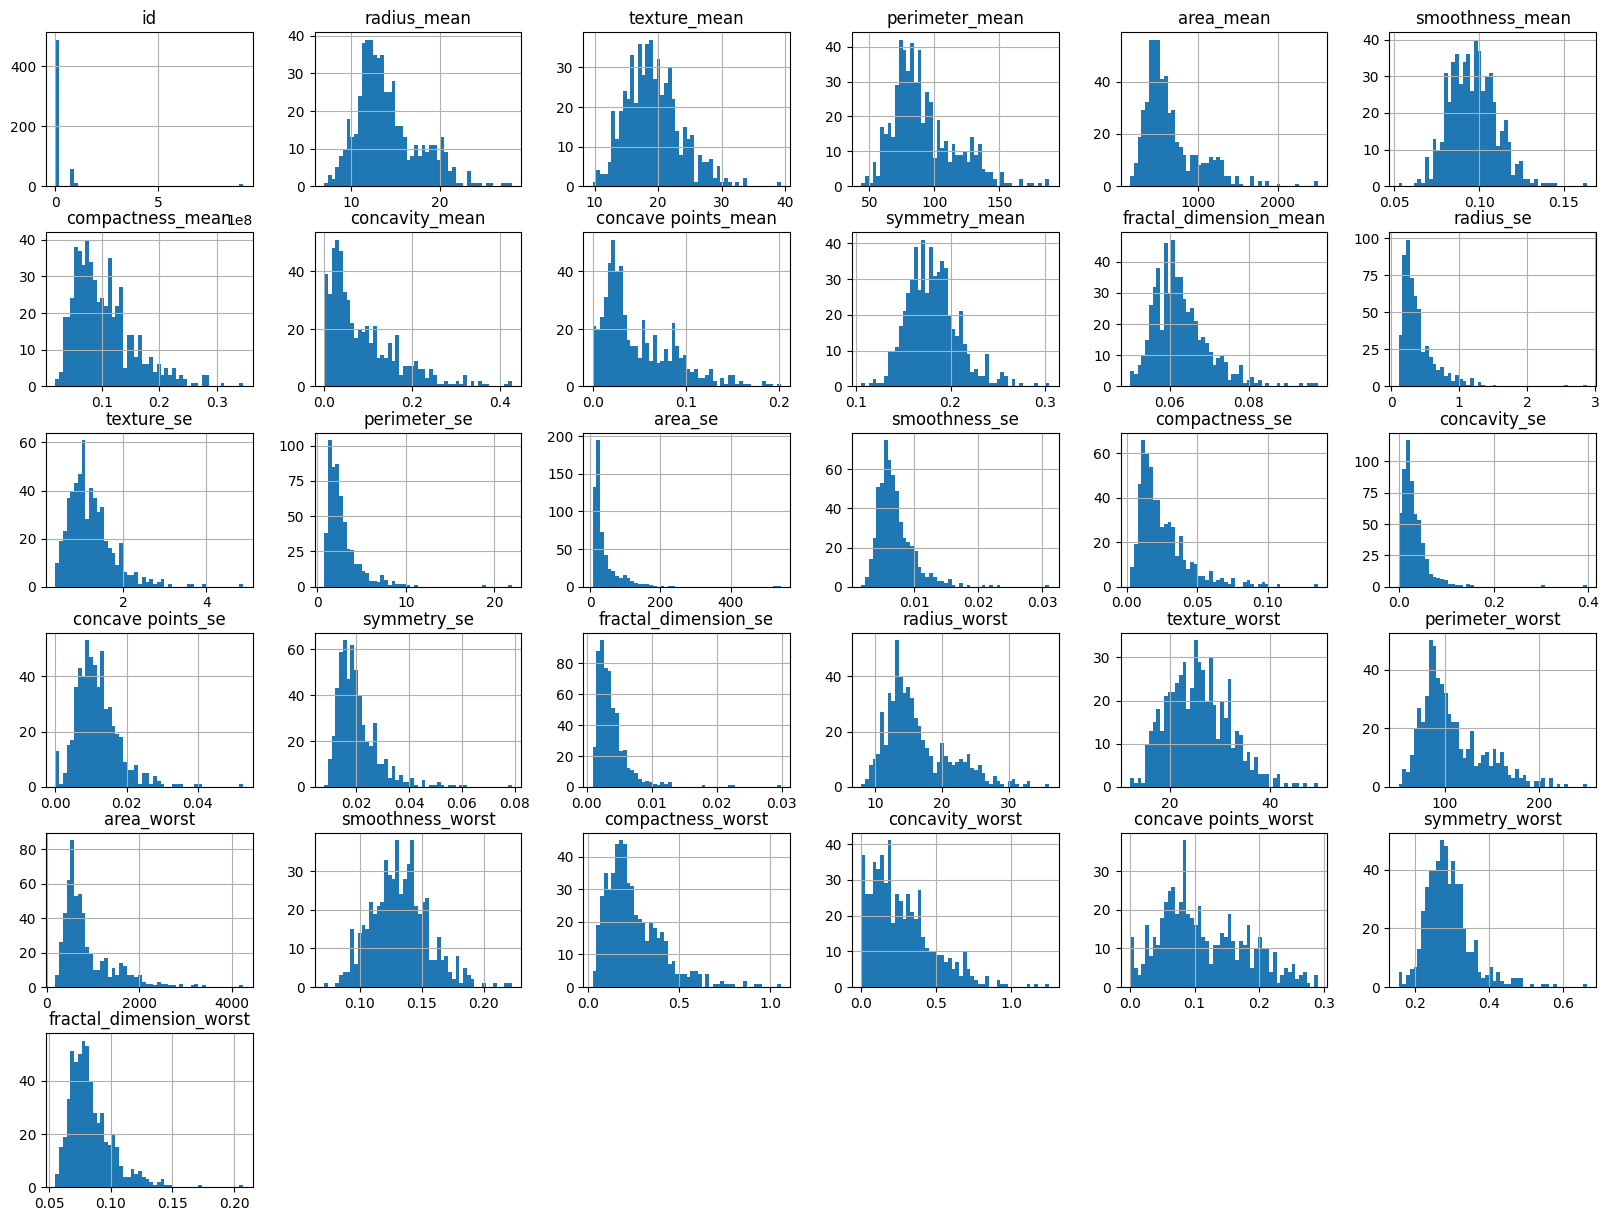

In [103]:
data.hist(bins=50,figsize=(20,15))
plt.show();

In [104]:
print("range area_mean:", data["area_mean"].min(), data["radius_mean"].max())
print("range smoothness_mean:", data['smoothness_mean'].min(), data['smoothness_mean'].max())
print("range concavity_mean:", data['concavity_mean'].min(), data['concavity_mean'].max())

range area_mean: 143.5 28.11
range smoothness_mean: 0.05263 0.1634
range concavity_mean: 0.0 0.4268


## Создание тестового набора данных

### Простой способ разбиения на тренировочный и тестовый наборы
Проблема заключается в том, что каждый раз будет генерироваться новые наборы и в таком случае алгоритм увидит все ваши данные
Для решения проблем нужно либо при первом прогоне сохранить их либо установить seed.
Но и это не самый надежный способ, так как он перестает работать на обновленном и загруженном датасете

In [105]:
#упрощенный вариант train_test_split
def split_train_test(data,test_ratio,random_state=42):
    np.random.seed(random_state)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(test_ratio * len(data))
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

train_set,test_set = split_train_test(data,0.2)
print("Train set length:", len(train_set))
print("Test set length:", len(test_set))

Train set length: 456
Test set length: 113


Для  обеспечения стабтльного разделения наборов используют идентификатор(при условии, если он уникален и неизменяем)
Например вычислить хэш код экземляра и помещать его в тесторвый набор если значение его  хеша меньше или равен 20: от максимального хэша

In [106]:
from zlib import crc32
def test_set_check(identifier,test_ratio):
    return crc32(np.int64(identifier) & 0xffffffff) < test_ratio

def split_train_test_by_id(data,test_ratio,id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_,test_ratio))
    return data.loc[~in_test_set],data.loc[in_test_set]


Но наш набор не имеет идентификатора, универсальное решение представляет из себя использование индекса строки

In [107]:
data_with_id = data.reset_index()
train_set,test_set = split_train_test_by_id(data_with_id,0.2,"index")

In [109]:
from sklearn.model_selection import train_test_split

# train_test_split разбивает несколько наборов с одинаковым числом строк по одинаковым индексам
train_set,test_set = train_test_split(data,test_size = 0.2,random_state = 42 )

Случайные выборки хороши, когда объемы выборки велики. Но когда это не так велик риск смещения выборки (данная нерепрезентативна в плане распределений). Нужна стратификация

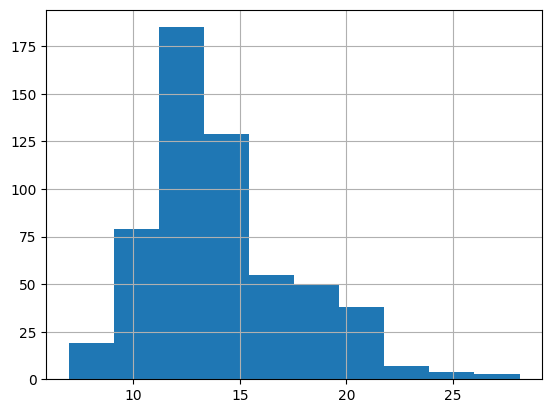

In [110]:
data['radius_mean'].hist();

In [111]:
data['radius_mean'] = pd.cut(data['area_mean'],bins=[0.,1.5,3,4.5,6, np.inf],labels=[1,2,3,4,5])

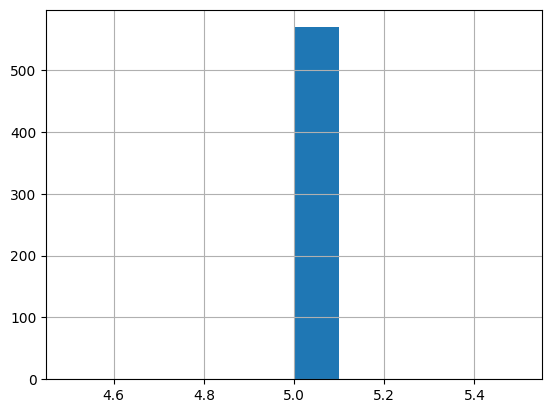

In [112]:
data['radius_mean'].hist();

### Стратификационная выборка

In [113]:
from sklearn.model_selection import StratifiedShuffleSplit
# или train_test_split с параметром stratify
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42)
for train_index, test_index in split.split(data,data['radius_mean']):
    print(train_index)
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

[479  83  50 503  41 467 434 336 384 548  51 158 349 514  19 112 469  46
 200   5 147 234 155 265 354 367 517 565 119  32 492 302 335 282 140  37
  15 486 196 271  10 364 396 244 194 176 531   9 371 115 328 443   0 405
 453  97  36 143 181 457 374  70 277 199 254 154 404 321 139 235 442 470
 551 545  95 145 425 206   2 262 431 480 468 116 142 267 424 149 419 239
  39  88 398 342  45 377 397 463  90 306 268 289 441  89 118 359  78 229
 126 165 179 172 451  28 257 415 547 129 157 198 197 182 253 382 462 527
 209 338 502 556 351  96 131 488 193 433 278 506  33 152 123 368 568 117
 498  74 238 312 247  55 192 381 195 557 436 163 561 464 290 263  76 395
 541 275 286 346 412 456 202 173 432 559 465 394  25  35 526 505  73 120
 307 324  79 521 294 500 231 110 213 174 301 408 471 183 323 450 543 403
 114 220  75  68 422 292 186 388 327 316  98 250 511 515 266 141 245 524
  85 297 132 496 530 513 519 113 363  47 180 392 544 376 144  72 150 546
 284 281  66 481 426  77 399 538 228  18 168 219 30

In [114]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop("radius_mean",axis=1,inplace=True)

In [115]:
data = strat_train_set.copy()

c:\Users\tsyganova\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


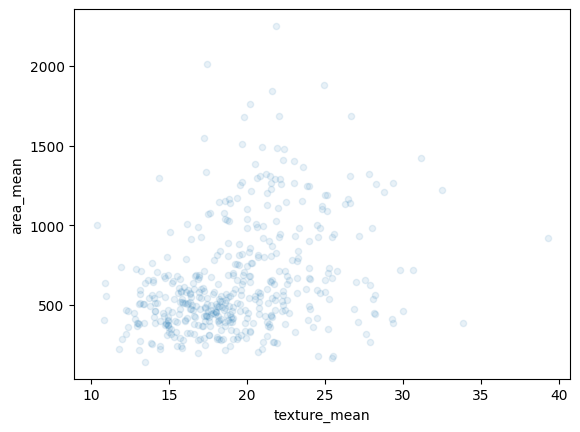

In [116]:
#диаграмма рассеяния
data.plot(kind='scatter',x='texture_mean',y = 'area_mean',alpha =0.1);

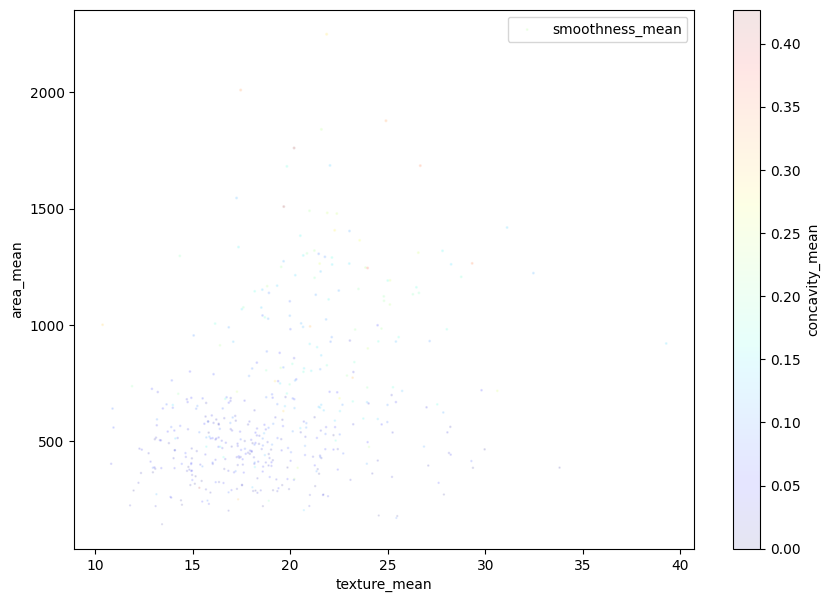

In [117]:
data.plot(kind='scatter',x='texture_mean',y = 'area_mean',alpha = 0.1,s=data['perimeter_mean']/100,label='smoothness_mean',figsize=(10,7),c='concavity_mean',cmap = plt.get_cmap('jet'),colorbar=True)
plt.legend()

Вычислим коэфицент корреляции Пирсона для выявляения линейных связей

In [118]:
corr_matrix = data.corr()
corr_matrix['texture_mean'].sort_values(ascending=False)

texture_mean               1.000000
texture_worst              0.911367
texture_se                 0.382780
perimeter_worst            0.360152
radius_worst               0.357278
area_worst                 0.351175
perimeter_mean             0.335353
area_mean                  0.333495
perimeter_se               0.312237
area_se                    0.309577
radius_se                  0.306779
concavity_mean             0.292652
concavity_worst            0.292496
concave points_mean        0.279539
compactness_worst          0.278374
concave points_worst       0.271900
compactness_mean           0.229360
compactness_se             0.187508
fractal_dimension_worst    0.127884
concave points_se          0.127501
concavity_se               0.115172
symmetry_worst             0.092876
id                         0.084123
fractal_dimension_se       0.066150
smoothness_worst           0.060772
symmetry_mean              0.049305
smoothness_se              0.001105
symmetry_se                0

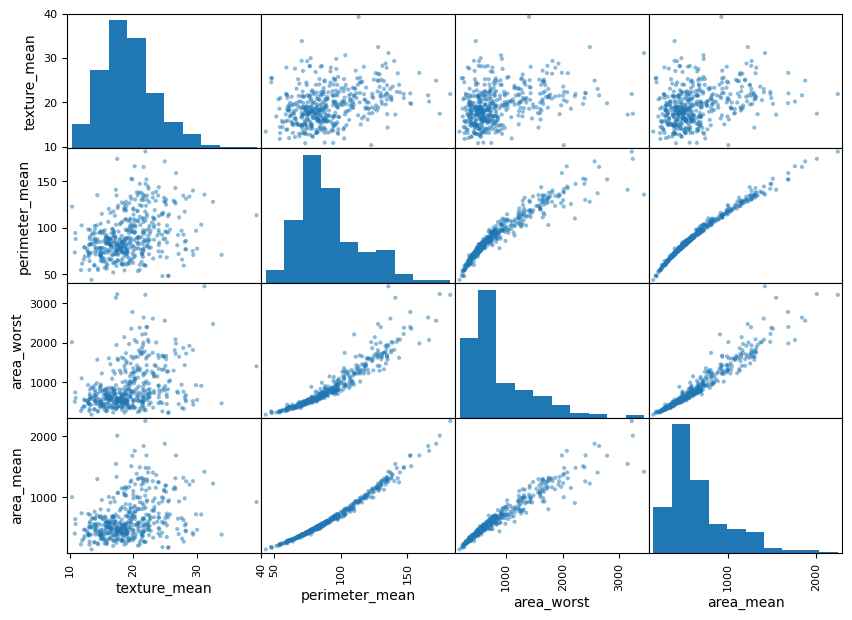

In [119]:
from pandas.plotting import scatter_matrix

attributes = ['texture_mean','perimeter_mean','area_worst','area_mean']
scatter_matrix(data[attributes],figsize=(10,7));

c:\Users\tsyganova\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='perimeter_mean', ylabel='perimeter_worst'>

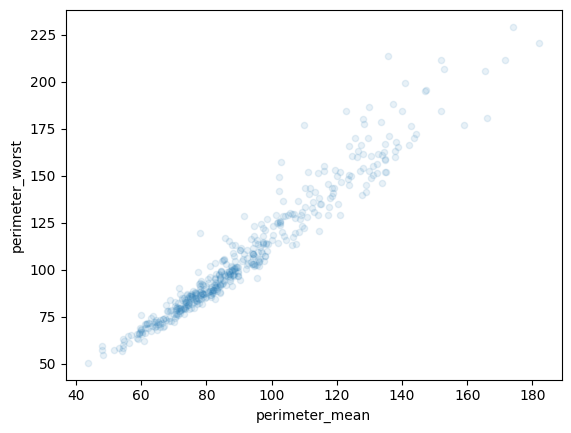

In [120]:
data.plot(kind='scatter',x='perimeter_mean',y='perimeter_worst',alpha=0.1)

## Комбинирование признаков

In [121]:
corr_matrix = data.corr()
corr_matrix['perimeter_mean'].sort_values(ascending=False)

perimeter_mean             1.000000
area_mean                  0.988534
perimeter_worst            0.969996
radius_worst               0.969297
area_worst                 0.941291
concave points_mean        0.847289
area_se                    0.797160
concave points_worst       0.781979
concavity_mean             0.699966
perimeter_se               0.693883
radius_se                  0.687960
compactness_mean           0.580588
concavity_worst            0.563453
compactness_worst          0.499344
concave points_se          0.398882
texture_mean               0.335353
texture_worst              0.320634
compactness_se             0.278398
smoothness_mean            0.227454
symmetry_worst             0.218711
symmetry_mean              0.202422
concavity_se               0.198101
smoothness_worst           0.169800
fractal_dimension_worst    0.068555
id                         0.027782
fractal_dimension_se       0.006736
texture_se                -0.105577
symmetry_se               -0

In [122]:
needed_features = ['area_mean','perimeter_mean','texture_mean']


In [123]:
data = strat_train_set.drop('diagnosis',axis=1)
housing_labels = strat_train_set['diagnosis'].copy()

### Работа с пропусками
Есть три варианта работы с пропусками в данных
- Избавиться от объектов с пропусками
- Избавиться от самого признака
- замена недостающего значения (ноль, средняя, медиана). Ее нужно запомнить для заполнения пропусков в тестовом наборе

In [124]:
# замена медианой
median = data['area_mean'].median()
data['area_mean'].fillna(median,inplace=True)

Другой способ позаботиться о пропусках - SimpleImputer

In [125]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median') # cчитается на числовых признаках, придется вручную откидывать нечисловые признаки

In [146]:
# data
data_num = data.drop('area_mean',axis = 1)
imputer.fit(data_num)
imputer.statistics_ == data_num.median().values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [147]:
X = imputer.transform(data_num)

In [148]:
data_tranformed = pd.DataFrame(X, columns=data_num.columns,index=data_num.index)
data_tranformed

,id,texture_mean,perimeter_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
479,911916.0,19.51,109.80,0.10260,0.18930,0.22360,0.09194,0.2151,0.06578,0.3147,...,17.39,23.05,122.10,939.7,0.1377,0.44620,0.58970,0.17750,0.3318,0.09136
83,8611792.0,26.29,129.10,0.12150,0.17910,0.19370,0.14690,0.1634,0.07224,0.5190,...,20.33,32.72,141.30,1298.0,0.1392,0.28170,0.24320,0.18410,0.2311,0.09203
50,857343.0,21.60,74.72,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,0.4062,...,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563
503,915143.0,19.83,152.10,0.09342,0.12750,0.16760,0.10030,0.1505,0.05484,1.2910,...,30.79,23.87,211.50,2782.0,0.1199,0.36250,0.37940,0.22640,0.2908,0.07277
41,855563.0,21.35,71.90,0.12270,0.12180,0.10440,0.05669,0.1895,0.06870,0.2366,...,12.84,35.34,87.22,514.0,0.1909,0.26980,0.40230,0.14240,0.2964,0.09606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,8813129.0,17.02,84.55,0.08445,0.04994,0.03554,0.02456,0.1496,0.05674,0.2927,...,15.14,23.60,98.84,708.8,0.1276,0.13110,0.17860,0.09678,0.2506,0.07623
24,852552.0,21.38,110.00,0.11210,0.14570,0.15250,0.09170,0.1995,0.06330,0.8068,...,26.46,31.56,177.00,2215.0,0.1805,0.35780,0.46950,0.20950,0.3613,0.09564
218,8811842.0,21.56,129.70,0.09383,0.13060,0.12720,0.08691,0.2094,0.05581,0.9553,...,25.73,28.64,170.30,2009.0,0.1353,0.32350,0.36170,0.18200,0.3070,0.08255
420,906539.0,19.04,74.20,0.08546,0.07722,0.05485,0.01428,0.2031,0.06267,0.2864,...,13.07,26.98,86.43,520.5,0.1249,0.19370,0.25600,0.06664,0.3035,0.08284


Работа с категориальными признаками

In [149]:
data_category = data[['area_mean']]
data_category

,area_mean
479,815.8
83,1132.0
50,427.9
503,1682.0
41,371.1
...,...
224,546.4
24,904.6
218,1230.0
420,409.7


In [150]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [151]:
category_encoded = ordinal_encoder.fit_transform(data_category)
category_encoded[:10]

array([[338.],
       [387.],
       [120.],
       [431.],
       [ 70.],
       [ 29.],
       [292.],
       [197.],
       [216.],
       [ 28.]])

In [152]:
ordinal_encoder.categories_

[array([ 143.5,  170.4,  178.8,  181. ,  201.9,  203.9,  221.2,  221.3,
         221.8,  224.5,  227.2,  230.9,  241. ,  244.5,  245.2,  246.3,
         250.5,  257.8,  260.9,  264. ,  268.8,  269.4,  271.2,  271.3,
         272.5,  278.6,  279.6,  280.5,  285.7,  286.3,  288.1,  288.5,
         289.1,  289.7,  290.2,  293.2,  294.5,  295.4,  298.3,  300.2,
         302.4,  307.3,  310.8,  311.7,  311.9,  313.1,  317.5,  320.8,
         321.4,  321.6,  324.2,  324.9,  329.6,  333.6,  334.2,  336.1,
         337.7,  338.3,  340.9,  346.4,  347. ,  349.6,  355.3,  360.5,
         361.6,  363.7,  365.6,  366.5,  366.8,  370. ,  371.1,  371.5,
         372.7,  373.2,  373.9,  378.2,  378.4,  380.3,  381.1,  381.9,
         384.6,  384.8,  386. ,  386.1,  386.3,  386.8,  387.3,  388. ,
         389.4,  390. ,  391.2,  392. ,  394.1,  395.7,  396. ,  396.5,
         398. ,  399.8,  402. ,  402.7,  402.9,  403.1,  403.3,  403.5,
         406.3,  408.2,  408.8,  409. ,  409.7,  412.6,  412.7, 

С таким представлением мы добавляем корреляцию в признаки - два соседних значения более похожи, чем два отдаленных значения. В некоторых ситуация такое допущение является приемлимым. Но не в данном случае. Распространненое решение заключается в создании бинарного атрибута  на категорию (one-hot encoding).


In [153]:
from sklearn.preprocessing import OneHotEncoder
onehotEnconder = OneHotEncoder()
data_category_one_hot = onehotEnconder.fit_transform(data_category)
data_category_one_hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Собственный трансформер

In [154]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix,bedrooms_ix,population_ix,households_idx = 3,4,5,6


class CombinedAttributeAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedrooms_per_room = False):
        self.add_bedrooms_per_room =add_bedrooms_per_room

    def fit(self,X,y = None):
        return self

    def transform(self,X,y=None):
        rooms_per_household = X[:, rooms_ix] / X[:,households_idx]
        population_per_household = X[:, population_ix] / X[:,households_idx]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_household]




In [166]:
additive_transformer = CombinedAttributeAdder(add_bedrooms_per_room = False)
data_extra_attributes = additive_transformer.transform(data.values)

C:\Users\tsyganova\AppData\Local\Temp\ipykernel_41640\1558579991.py:13: RuntimeWarning: divide by zero encountered in divide
  rooms_per_household = X[:, rooms_ix] / X[:,households_idx]
C:\Users\tsyganova\AppData\Local\Temp\ipykernel_41640\1558579991.py:14: RuntimeWarning: divide by zero encountered in divide
  population_per_household = X[:, population_ix] / X[:,households_idx]


In [163]:
data_extra_attributes

array([[9.11916000e+05, 1.95100000e+01, 1.09800000e+02, ...,
        9.13600000e-02, 3.64847943e+03, 8.46601073e-01],
       [8.61179200e+06, 2.62900000e+01, 1.29100000e+02, ...,
        9.20300000e-02, 5.84408880e+03, 9.24625710e-01],
       [8.57343000e+05, 2.16000000e+01, 7.47200000e+01, ...,
        6.56300000e-02, 2.58237779e+04, 2.99698250e+00],
       ...,
       [8.81184200e+06, 2.15600000e+01, 1.29700000e+02, ...,
        8.25500000e-02, 9.66981132e+03, 1.02672956e+00],
       [9.06539000e+05, 1.90400000e+01, 7.42000000e+01, ...,
        8.28400000e-02, 7.46946217e+03, 1.40783956e+00],
       [8.83263000e+05, 2.14600000e+01, 1.32500000e+02, ...,
        7.12700000e-02, 1.44437071e+04, 9.23247069e-01]])

## Конвейризация

In [167]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('attribs_adder',CombinedAttributeAdder()),
    ('std_scaler', StandardScaler())
])

data_num_transformed = pipeline.fit_transform(data_num)

In [139]:
data_num_transformed

array([[-0.23640517,  1.09706398, -2.07333501, ...,  1.93701461,
        -1.32139417, -1.50026235],
       [-0.23640344,  1.82982061, -0.35363241, ...,  0.28118999,
         1.39226333, -0.09004095],
       [ 0.43174109,  1.57988811,  0.45618695, ...,  0.20139121,
        -0.51521406, -0.93943772],
       ...,
       [-0.23572747,  0.70228425,  2.0455738 , ..., -0.31840916,
         0.01907726, -0.6338892 ],
       [-0.23572517,  1.83834103,  2.33645719, ...,  2.21963528,
        -1.18346611, -1.50295304],
       [-0.24240586, -1.80840125,  1.22179204, ..., -0.75120669,
         0.10592273,  0.18935386]])

In [ ]:
from sklearn.compose import ColumnTransformer
num_attributes = list(data_num)
cat_attributes = ['radius_worst']

full_pipeline = ColumnTransformer([
    ("num", pipeline,num_attributes),
    ("cat", OneHotEncoder(),cat_attributes)
])


data_prepared = full_pipeline.fit_transform(data_num)
data_prepared

[Text(0.5, 1.0, 'Perimeter Mean Loss in Perimeter Worst')]

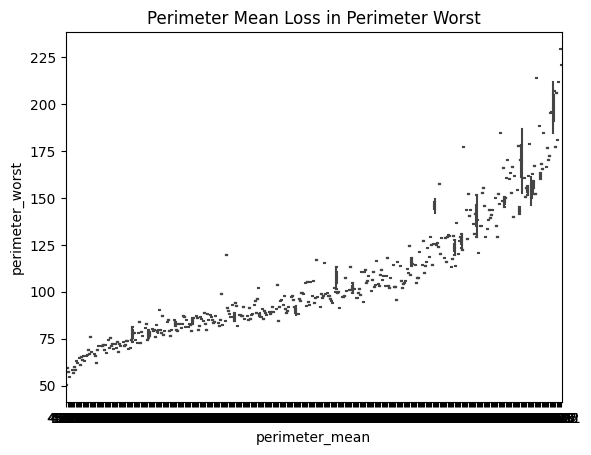

In [171]:
import seaborn as sns
bp = sns.boxplot(x='perimeter_mean',y='perimeter_worst', data=data)
bp.set(title="Perimeter Mean Loss in Perimeter Worst")